In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%run functions.ipynb
%run Appliance_Information_Tools.ipynb

In [19]:
print(give_information(7))

          Appliance                Details
1         Aggregate                   None
2            Fridge      Bosch, KSR30422GB
3        Freezer(1)   Whirlpool, AFG 392/H
4        Freezer(2)       Unknown, Unknown
5      Tumble Dryer  White Knight, Unknown
6   Washing Machine         Bosch, Unknown
7        Dishwasher       Unknown, Unknown
8   Television Site       Unknown, Unknown
9           Toaster       Unknown, Unknown
10           Kettle  Sainsburys, 121988254


In [27]:
seven = read_clean_house(7, 8000000, drop_appliances=True)

In [61]:
seven.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6755967 entries, 2013-11-01 22:01:18 to 2015-07-08 02:10:54
Data columns (total 1 columns):
 #   Column     Dtype
---  ------     -----
 0   Aggregate  int64
dtypes: int64(1)
memory usage: 103.1 MB


In [51]:
seven_resampled = seven.resample('30T').mean()


In [60]:
seven_resampled.describe()

,Aggregate,hour,day_of_week,month,is_weekend
count,25823.000000,25823.000000,25823.000000,25823.000000,25823.000000
mean,561.929890,11.522519,3.031832,6.490841,0.290284
std,646.312395,6.934474,1.990935,3.593391,0.453902
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,167.100000,6.000000,1.000000,3.000000,0.000000
50%,235.460000,12.000000,3.000000,6.000000,0.000000
75%,724.834777,18.000000,5.000000,10.000000,1.000000
max,6546.000000,23.000000,6.000000,12.000000,1.000000


In [53]:
seven_resampled['hour'] = seven_resampled.index.hour
seven_resampled['day_of_week'] = seven_resampled.index.dayofweek  # Monday=0, Sunday=6
seven_resampled['month'] = seven_resampled.index.month
seven_resampled['is_weekend'] = seven_resampled['day_of_week'].isin([5, 6]).astype(int)

In [58]:
seven_resampled['2014-02-01':'2014-02-28'].head()

,Aggregate,hour,day_of_week,month,is_weekend
Time,,,,,


In [55]:
seven_resampled.dropna(inplace=True)

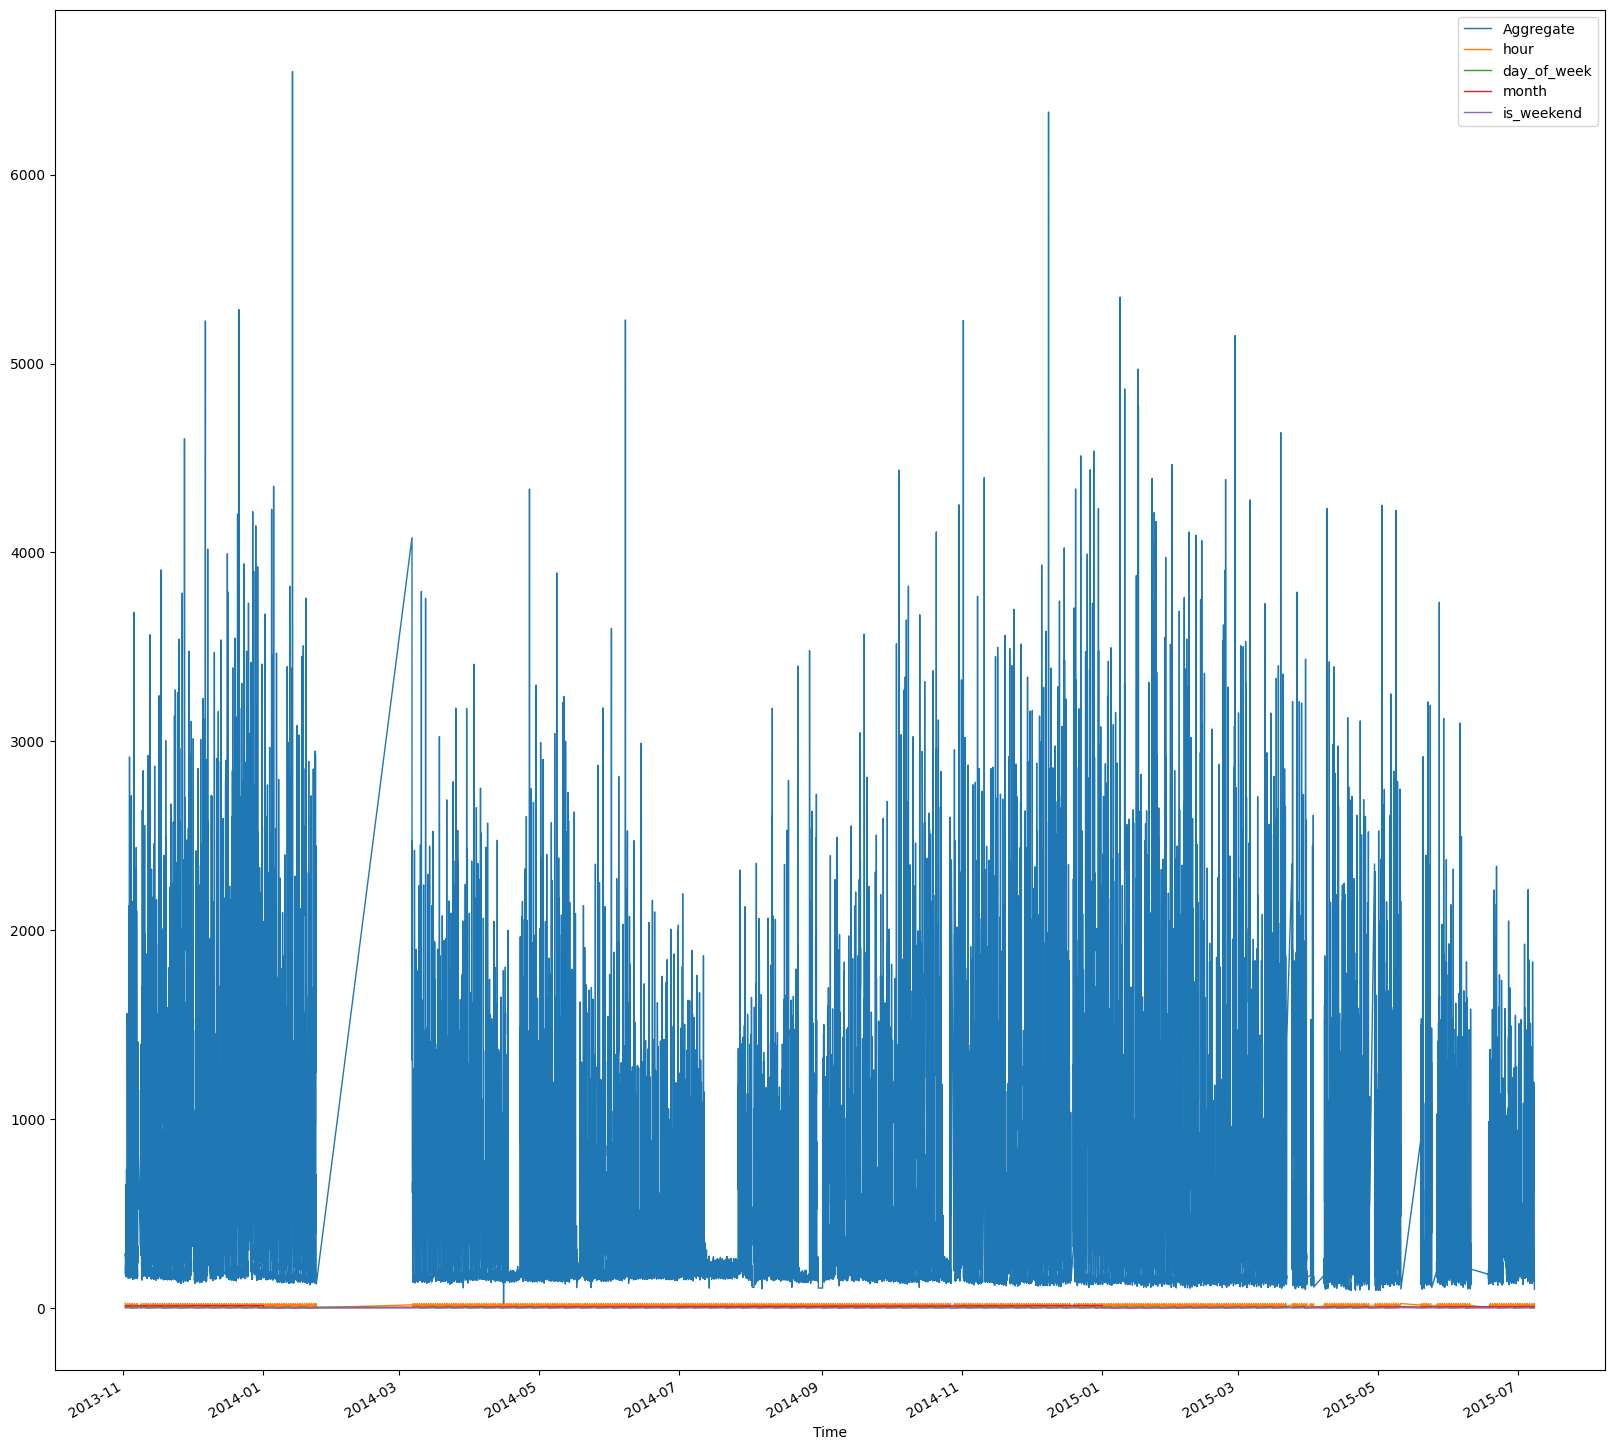

In [56]:
big_plot(seven_resampled)